## Starter code for assignment 1
This notebook contains the starter code for assignment 1, with unfinished sections for your to complete. Please work through it, and add your code where instructed. There are short-answer writen questions as well at the bottom of the notebook.

When you're finished, save and submit your completed notebook, including the output from your final run.

In [1]:
import matplotlib.pyplot as plt

# Display figures inline (rather than opening a new window)
%matplotlib inline

import numpy as np

# For compatibility between Python 2 and 3
from six.moves import urllib

from sklearn.model_selection import StratifiedShuffleSplit    

from scipy import stats

## Download the mini-cifar data
Understand the format, and visualize images.

In [2]:
source = "https://storage.googleapis.com/jbgordon/mini-cifar.npz"
dest = "mini-cifar.npz"
urllib.request.urlretrieve(source, dest)
loaded = np.load(open(dest))
examples, labels, class_names = loaded["X"], loaded["y"], loaded["class_names"]

Let's look at the format of an image. Below we see the shape of our data is n_examples x 32 x 32 x 3. The dimensions correspond to:
* Number of examples.
* Rows in an image.
* Columns in an image.
* Color channels (R,G,B).

In [3]:
examples.shape

(1800, 32, 32, 3)

Let's inspect the labels.

In [4]:
labels.shape

(1800,)

This dataset is balanced (contains an equal number of examples of each class). We've stored these in *class_names* for convenience.

In [5]:
stats.itemfreq(labels)

array([[  0, 600],
       [  1, 600],
       [  2, 600]])

In [6]:
class_names

array(['plane', 'car', 'bird'],
      dtype='|S5')

Let's display a few examples from each class. 

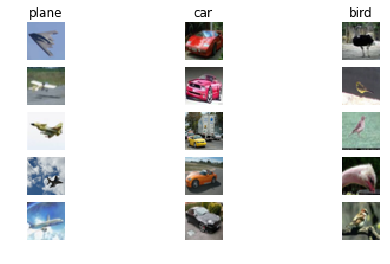

In [7]:
num_classes = len(class_names)
examples_per_class = 5
# We'll create a grid of plots, then populate them with images
f, ax = plt.subplots(examples_per_class, num_classes)
for class_idx in range(len(class_names)):
    # Find the indicies in the examples for this class
    matching_indices = np.where(labels == class_idx)[0]
    for example_n in range(examples_per_class):
        # The images are stored as floats but need to be converted to ints
        # so they display properly
        example = examples[matching_indices[example_n]].astype('uint8')
        ax[example_n, class_idx].imshow(example)
        ax[example_n, class_idx].axis('off')
        plt.axis('off')
        if example_n == 0:
            ax[example_n, class_idx].set_title(class_names[class_idx])
f.set_size_inches(8,4)
plt.show() 

In case that code is a bit of a handful, here's a block you can use to display a single image.

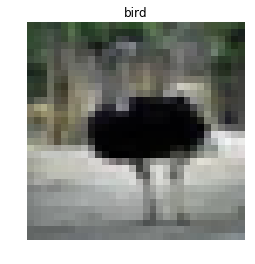

In [8]:
idx = 0
plt.imshow(examples[idx].astype('uint8'))
plt.title(class_names[labels[idx]])
plt.axis('off')
plt.show()

## Prepare the data

In [9]:
# Flatten the images (reshaping from n_examples x 32 x 32 x 3 to n_examples x 3072)
examples = np.reshape(examples, (examples.shape[0], -1))
examples.shape

(1800, 3072)

Next, we'll divide the data into train and test.

In [10]:
# A helpful utility to create balanced splits
# See: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
sss = StratifiedShuffleSplit(train_size=1200, n_splits=1, 
                             test_size=200, random_state=0)  

for train_index, test_index in sss.split(examples, labels):
    X_train, X_test = examples[train_index], examples[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [11]:
print("Train examples: %d" % X_train.shape[0])
print("Test examples: %d" % X_test.shape[0])

Train examples: 1200
Test examples: 200


## Part 1) Complete the kNN classifer
You'll need to modify it to a) compute distance between examples, and b) to work with different values of k.

In [12]:
class KNNClassifier(object):
    def __init__(self):
        pass
    
    def train(self, X_train, y_train):
        """
        Train the model.

        Inputs:
        - X_train: A numpy array of shape (train_examples, features) 
        containing the training data.
        - y_train: A numpy array of shape (train_examples,) 
        containing the training labels.
        """
        self.X_train = X_train
        self.y_train = y_train
    
    def distance_matrix(self, X_test):
        """
        Calculate a distance matrix.

        Inputs:
        - X: A numpy array of shape (test_examples, pixels) containing the test data.

        Returns:
        - distances: A numpy array of shape (test_examples, train_examples). 
        Distances[i, j] gives the Euclidean distance between the ith testing point 
        and the jth training point. 
        """
        test_size = X_test.shape[0]
        train_size = self.X_train.shape[0]
        
        # Rows give the distance from a test example to every training example
        distance_matrix = np.zeros((test_size, train_size)) 
        
        ########################################################################
        # TODO: Modify the code below.
        # 
        # Calculate the Euclidian distance between every ith test example
        # and jth training example, then store the result in the distance
        # matrix.
        # 
        # As implemented, this method currently computes a random distance.
        # Repalce that with Euclidian.
        # 
        # (Aside, this pair of nested for loops woefully inefficient, and 
        # can be improved by using vectorized operations in NumPy. 
        # Runtime performance is not important for this assignment).
        # 
        ########################################################################
        
        for i in range(test_size):
            for j in range(train_size):
                
                # Calculate the distance between X_test[i] and self.X_train[j]
                distance = np.sqrt(np.sum((X_test[i] - self.X_train[j]) ** 2))
                
                # Store the result in the distance matrix.
                distance_matrix[i,j] = distance

        return distance_matrix
    
    def predict(self, X_test, distance_matrix, k=1):
        """
        Predict labels for the testing data.

        Inputs:
        - X_test: A numpy array of shape (test_examples, features) containing the test data.
        - distance_matrix: A previously computed distance matrix, described above.
        
        Returns:
        - predictions: A numpy array of shape (test_examples,). 
        predictions[i] contains the predicted label for the ith testing example. 
        """
        
        # To make a prediction, we'll find the k-nearest training examples
        # to a test example in our distance matrix, and return their 
        # most common label as our prediction. Ties may be broken randomly.
        
        ########################################################################
        # TODO: Modify the code below.
        #
        # As written, this method works properly for k=1.
        # Improve it so it works for other values of k.
        #
        # **Hints**
        # 
        # We currently use np.argmin to find the index of the element with minimum 
        # distance. See the doc for ```np.argsort``` to do something similar 
        # for multiple elements. 
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
        # 
        ########################################################################
    
        test_size = X_test.shape[0]
        predictions = np.zeros(test_size)
        
        for i in range(test_size):
            row = distance_matrix[i]
            
            labels = np.take(y_train, row.argsort()[:k])
            
            # Store the result
            predictions[i] = np.argmax(np.bincount(labels))
            
            # Above is our prediction for this testing example. 
            # This works properly for k=1. You'll need to modify it
            # to work with other values of k.
            
        return predictions

In [13]:
classifier = KNNClassifier()
classifier.train(X_train, y_train)
distance_matrix = classifier.distance_matrix(X_test) 
predictions = classifier.predict(X_test, distance_matrix, k=1)

In [14]:
def accuracy(predicted, actual):
    correct = np.sum(predicted == actual)
    total = predicted.shape[0]
    accuracy = float(correct) / total
    return accuracy

acc = accuracy(predictions, y_test)
print('Accuracy: %.2f' % (acc))

if acc > 0.50:
    print ("Congrats! Your classifier is working well on this data.")
else:
    print ("Keep at it.")

Accuracy: 0.56
Congrats! Your classifier is working well on this data.


## Part 2) Short answer questions

Just a few sentences each is fine. Please write your answers in-line below.

1) Is the kNN classifier invariant to image orientation? E.g., what would happen if we used the model to make a prediction on a picture of a car that happened to upside down (assuming the training set contained images of cars right side up).

- Without having enough examples of upside down cars, the kNN classifier will not be able to predict a car accurately. The classifier simply tries to identify the closest image from the training set and it expects the pictures to be in the same orientation as it has been provided in the training set. So, kNN is not invariant to image orientation.

2) What are the pros/cons of using raw pixel values as features? It is sensisble to use them when working with images? Why or why not?

- Using raw pixel values as features provides a good way to numerically represent the content of the image and hence it is sensible to use them when working with images
- However, the problem with a method like KNN is that it does not perform any feature engineering and just relies on finding other similar/close images from the training set. If the training set is not comprehensive (including variants of the image) or if the problem is hard, it is likely that KNN with raw pixel inputs will perform poorly. We maybe better off extracting features and then feeding it into KNN.
- Additionally, KNN treats each pixel/feature as equally important and hence the distance metric might be influenced by similarity of the surroundings/environment of the picture rather than the subject of the picture and hence might provide poor results. This can partially be addressed by cleaning up the pictures or even performing PCA.

3) Is it important to normalize the data (e.g., by subtracting the mean and dividing by the standard deviation) when working with kNN? Why or why not?

- Yes, generally speaking, it is important to normalize the data. Different features may have different ranges (either because they measure different things or they have different units). If we do not normalize, the features with the higher magnitudes dictate the nearest neighbors. But we want all features to be given equal importance.
- However, if we know that the ranges and units of the features are already the same, normalizing might undesirably amplify effects in some cases where variation is small.

## Part 3) Collect your own dataset

In this section, you'll write code to:

* Download a small dataset (say, of 5 images - these can be of anything you like) from the web. You can use the urllib library above to download them.

* Next, convert these images into an appropriate format in NumPy.

* Finally, use your completed classifier above to train a model on these images and make predictions. Report your accuracy.

In [15]:
from sklearn.model_selection import train_test_split
from PIL import Image

image_links = ['https://goo.gl/1ZxprD', 'https://goo.gl/NDjTFo', 'https://goo.gl/1r1v18', \
               'https://goo.gl/WbpXPQ', 'https://goo.gl/2UHoK7']

image_labels = [0,1,1,0,0]

size = (200,200)
pixels = size[0] * size[1] * 3

examples = np.zeros((len(image_labels),pixels))
labels = np.array(image_labels)

for ctr, link in enumerate(image_links):
    urllib.request.urlretrieve(link, 'image-{}.jpg'.format(ctr+1))
    im = Image.open('image-{}.jpg'.format(ctr+1), 'r')
    im = im.resize(size)

    im_array = np.asarray(im)
    examples[ctr,:] = np.reshape(im_array, (pixels,))

X_train, X_test, y_train, y_test = train_test_split(examples, labels, test_size=0.2, random_state=42)

classifier = KNNClassifier()
classifier.train(X_train, y_train)
distance_matrix = classifier.distance_matrix(X_test) 
predictions = classifier.predict(X_test, distance_matrix, k=1)

acc = accuracy(predictions, y_test)
print('Accuracy: %.2f' % (acc))

if acc > 0.50:
    print ("Congrats! Your classifier is working well on this data.")
else:
    print ("Keep at it.")

Accuracy: 1.00
Congrats! Your classifier is working well on this data.


When you're finished, save your notebook (including the output from your final run) and submit your notebook on CourseWorks. Your completed notebook should run end-to-end with no user intervention required.